# Assignment#4: Perceptron


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Data Loading and Exploration

In [4]:
# Load data
data = pd.read_csv('data.csv', header=None)
data.columns = ['X1', 'X2', 'y']
print("Data shape:", data.shape)
data.head()

Data shape: (100, 3)


,X1,X2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


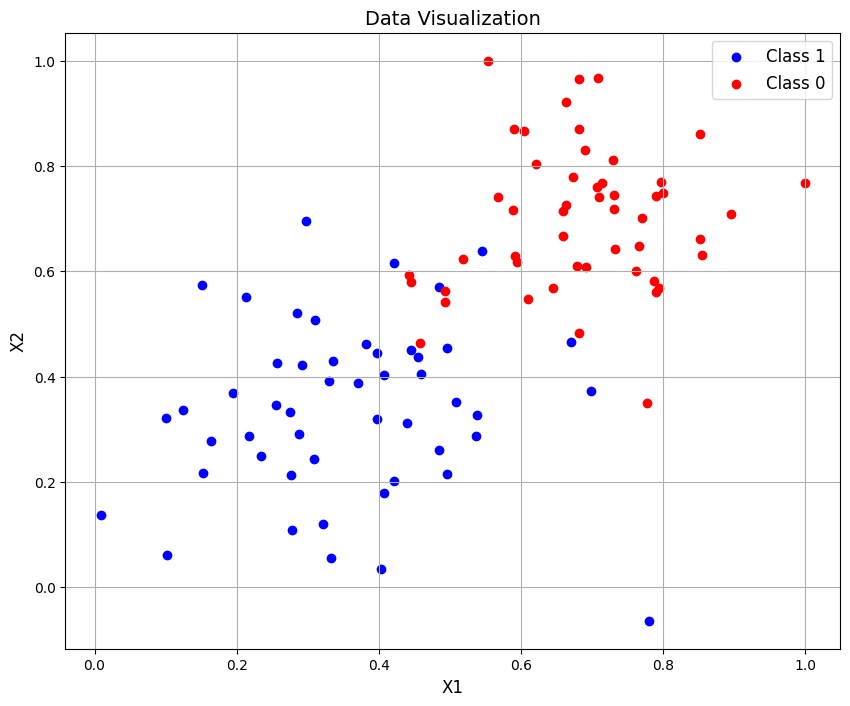

In [5]:
# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(data[data['y'] == 1]['X1'], data[data['y'] == 1]['X2'], color='blue', label='Class 1')
plt.scatter(data[data['y'] == 0]['X1'], data[data['y'] == 0]['X2'], color='red', label='Class 0')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Data Visualization', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('data_visualization.png')
plt.show()

## Part 1: Perceptron with Heuristic Approach

In [6]:
class PerceptronHeuristic:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.decision_boundaries = []
        
    def initialize_parameters(self, n_features):
        """
        Initialize weights and bias with random values
        """
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()
        # Store initial decision boundary
        self.decision_boundaries.append((self.weights.copy(), self.bias, 'initial'))
    
    def predict(self, X):
        """
        Make predictions using the current weights and bias
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = np.where(linear_output >= 0, 1, 0)
        return y_pred
    
    def fit(self, X, y, max_iterations=1000):
        """
        Train the perceptron using the heuristic approach
        """
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)
        
        iteration = 0
        converged = False
        
        while not converged and iteration < max_iterations:
            converged = True
            for i in range(n_samples):
                xi = X[i]
                yi = y[i]
                
                # Make prediction for current sample
                prediction = 1 if np.dot(xi, self.weights) + self.bias >= 0 else 0
                
                # Update weights and bias if misclassified
                if prediction != yi:
                    if prediction == 0:  # Classified as 0 but it's 1
                        self.bias += self.learning_rate
                        self.weights += self.learning_rate * xi
                    else:  # Classified as 1 but it's 0
                        self.bias -= self.learning_rate
                        self.weights -= self.learning_rate * xi
                    
                    converged = False
            
            # Store current decision boundary after each iteration
            if not converged:
                self.decision_boundaries.append((self.weights.copy(), self.bias, 'intermediate'))
            
            iteration += 1
        
        # Store final decision boundary
        self.decision_boundaries.append((self.weights.copy(), self.bias, 'final'))
        
        return iteration
    
    def plot_decision_boundary(self, X, y, title=''):
        """
        Plot the data points and decision boundaries
        """
        # Create a new figure
        plt.figure(figsize=(10, 8))
        
        # Plot data points
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
        
        # Plot decision boundaries
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        x1 = np.linspace(x_min, x_max, 100)
        
        # Plot different types of boundaries
        for i, (w, b, boundary_type) in enumerate(self.decision_boundaries):
            # Calculate the corresponding x2 values for the decision boundary
            if w[1] != 0:  # Avoid division by zero
                x2 = -(w[0] * x1 + b) / w[1]
                
                if boundary_type == 'initial':
                    plt.plot(x1, x2, 'r-', linewidth=2, label='Initial boundary')
                elif boundary_type == 'intermediate':
                    plt.plot(x1, x2, 'g--', alpha=0.3, linewidth=1, label='_nolegend_')
                elif boundary_type == 'final':
                    plt.plot(x1, x2, 'k-', linewidth=2, label='Final boundary')
        
        plt.xlabel('X1', fontsize=12)
        plt.ylabel('X2', fontsize=12)
        plt.title(f'Solution boundary\n{title}', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.xlim(x_min, x_max)
        plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)


Plot: Part 1 - Heuristic Approach with learning_rate = 0.01


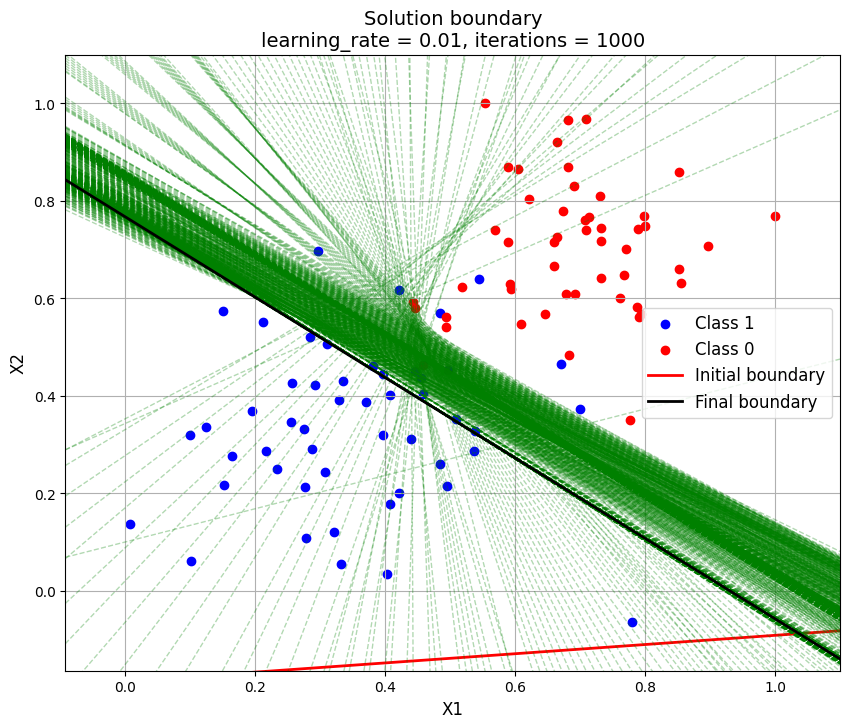


Plot: Part 1 - Heuristic Approach with learning_rate = 0.1


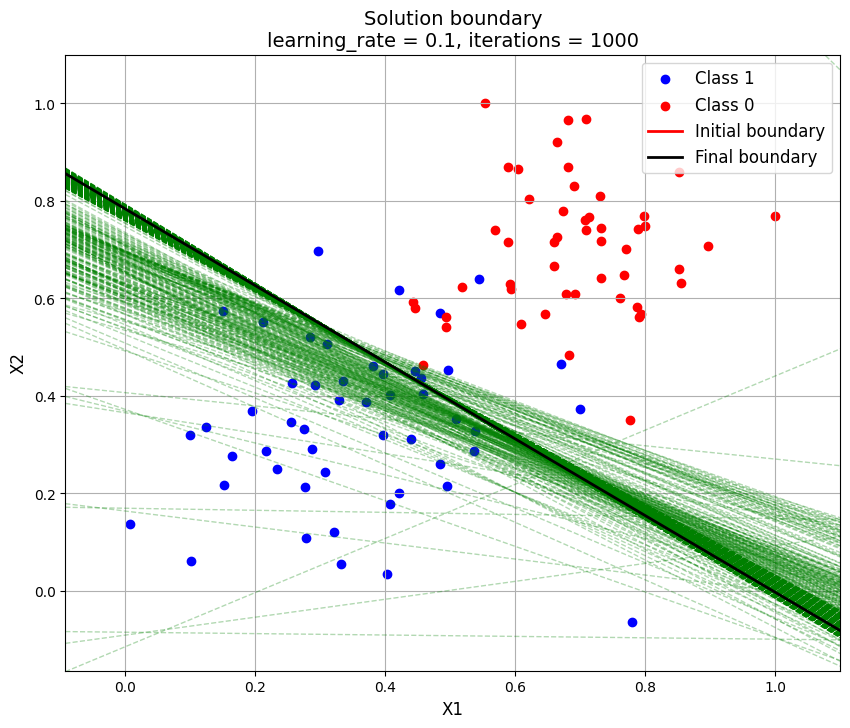


Plot: Part 1 - Heuristic Approach with learning_rate = 1.0


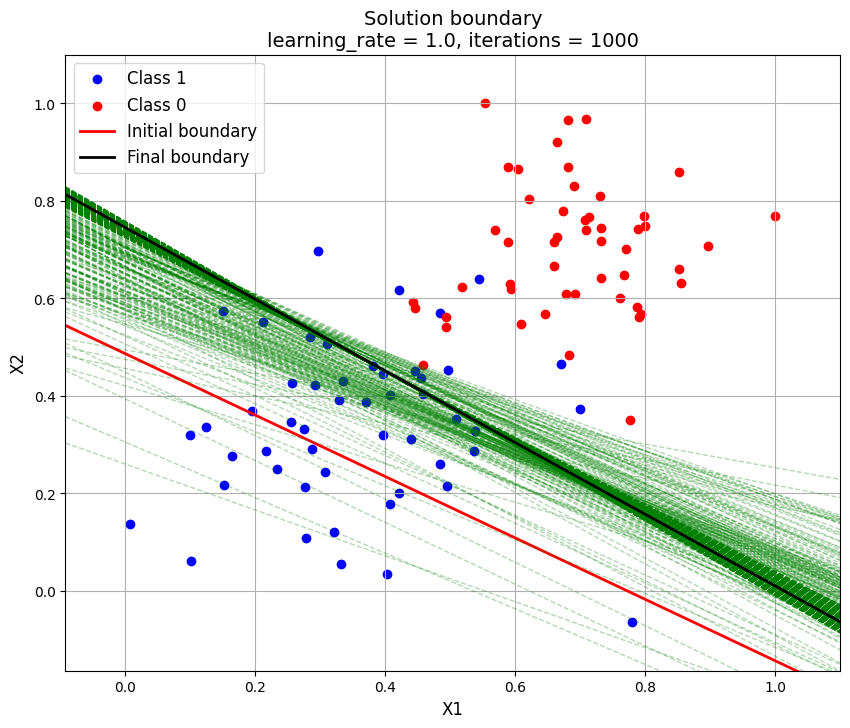


Part 1 Results:


,learning_rate,iterations,final_weights,final_bias
0,0.01,1000,"[-0.13684938476419767, -0.16581163537433544]",0.127341
1,0.10,1000,"[-0.8739147408902393, -1.110438222908007]",0.870871
2,1.00,1000,"[-7.8659531675637835, -10.690256995798238]",7.974875


In [7]:
# Prepare data for Part 1
X = data[['X1', 'X2']].values
y = data['y'].values

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 1.0]
results_part1 = []

for lr in learning_rates:
    print(f"\nPlot: Part 1 - Heuristic Approach with learning_rate = {lr}")
    
    # Initialize and train perceptron
    model = PerceptronHeuristic(learning_rate=lr)
    iterations = model.fit(X, y)
    
    # Plot decision boundary
    model.plot_decision_boundary(X, y, title=f'learning_rate = {lr}, iterations = {iterations}')
    plt.savefig(f'part1_lr_{lr}.png')
    plt.show()
    
    # Store results
    results_part1.append({
        'learning_rate': lr,
        'iterations': iterations,
        'final_weights': model.weights,
        'final_bias': model.bias
    })

# Display results table
print("\nPart 1 Results:")
results_df = pd.DataFrame(results_part1)
results_df

## Part 2: Perceptron with Gradient Descent Approach

In [8]:
class PerceptronGradientDescent:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.decision_boundaries = []
        self.losses = []
        self.epoch_indices = []
    
    def initialize_parameters(self, n_features):
        """
        Initialize weights and bias with random values
        """
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()
        # Store initial decision boundary
        self.decision_boundaries.append((self.weights.copy(), self.bias, 'initial'))
    
    def sigmoid(self, z):
        """
        Sigmoid activation function
        """
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def predict_proba(self, X):
        """
        Predict probability using sigmoid activation
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_output)
    
    def predict(self, X, threshold=0.5):
        """
        Make binary predictions
        """
        return (self.predict_proba(X) >= threshold).astype(int)
    
    def compute_loss(self, X, y):
        """
        Compute log loss (binary cross-entropy)
        """
        y_pred = self.predict_proba(X)
        epsilon = 1e-15  # Small value to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        """
        Train the perceptron using gradient descent
        """
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)
        
        # Reset losses and epoch indices
        self.losses = []
        self.epoch_indices = []
        
        # Calculate initial loss
        initial_loss = self.compute_loss(X, y)
        self.losses.append(initial_loss)
        self.epoch_indices.append(0)
        
        for epoch in range(1, self.epochs + 1):
            # Compute predictions
            y_pred = self.predict_proba(X)
            
            # Compute error
            error = y_pred - y
            
            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * np.dot(X.T, error) / n_samples
            self.bias -= self.learning_rate * np.sum(error) / n_samples
            
            # Store intermediate boundary for better visualization (roughly every 10% of epochs)
            if epoch % max(1, self.epochs // 10) == 0 and epoch < self.epochs:
                self.decision_boundaries.append((self.weights.copy(), self.bias, 'intermediate'))
            
            # Compute and store loss every 10 epochs (as required in the assignment)
            if epoch % 10 == 0 or epoch == self.epochs:
                loss = self.compute_loss(X, y)
                self.losses.append(loss)
                self.epoch_indices.append(epoch)
        
        # Store final decision boundary
        self.decision_boundaries.append((self.weights.copy(), self.bias, 'final'))
    
    def plot_decision_boundary(self, X, y, title=''):
        """
        Plot the data points and decision boundaries
        """
        # Create a new figure
        plt.figure(figsize=(10, 8))
        
        # Plot data points
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
        
        # Plot decision boundaries
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        x1 = np.linspace(x_min, x_max, 100)
        
        # Plot different types of boundaries
        for i, (w, b, boundary_type) in enumerate(self.decision_boundaries):
            # Calculate the corresponding x2 values for the decision boundary
            if w[1] != 0:  # Avoid division by zero
                x2 = -(w[0] * x1 + b) / w[1]
                
                if boundary_type == 'initial':
                    plt.plot(x1, x2, 'r-', linewidth=2, label='Initial boundary')
                elif boundary_type == 'intermediate':
                    plt.plot(x1, x2, 'g--', alpha=0.3, linewidth=1, label='_nolegend_')
                elif boundary_type == 'final':
                    plt.plot(x1, x2, 'k-', linewidth=2, label='Final boundary')
        
        plt.xlabel('X1', fontsize=12)
        plt.ylabel('X2', fontsize=12)
        plt.title(f'Solution boundary\n{title}', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.xlim(x_min, x_max)
        plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
    
    def plot_error(self):
        """
        Plot the error over epochs (recorded every 10 epochs)
        """
        # Create a new figure
        plt.figure(figsize=(10, 6))
        
        plt.plot(self.epoch_indices, self.losses, 'b-', linewidth=2, marker='o')
        plt.xlabel('Number of epochs', fontsize=12)
        plt.ylabel('Error', fontsize=12)
        plt.title('Error Plot (Every 10 Epochs)', fontsize=14)
        plt.grid(True)


Plot: Part 2 - Decision Boundary with learning_rate = 0.01, epochs = 100


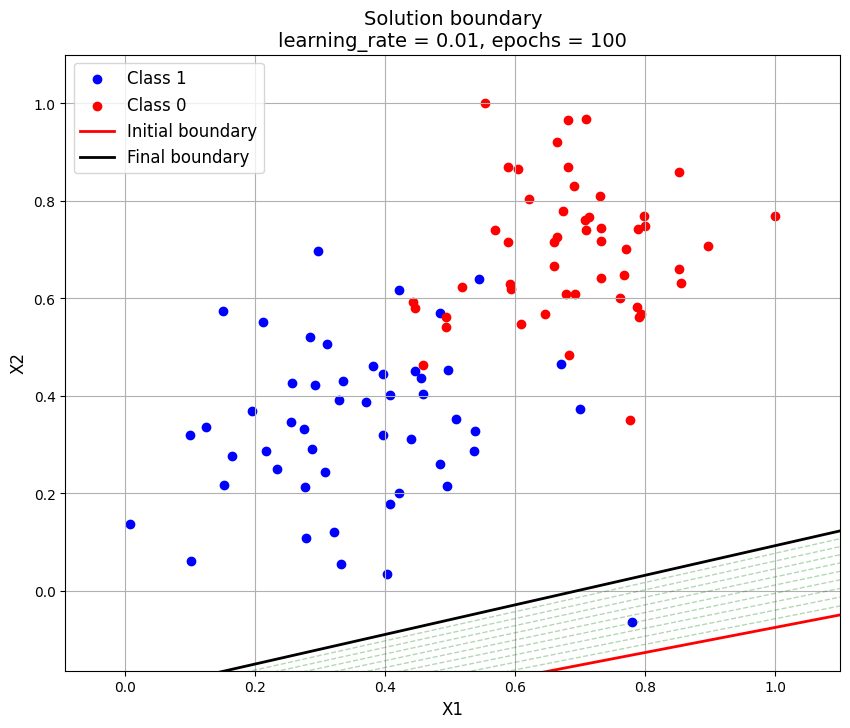

Plot: Part 2 - Error Plot with learning_rate = 0.01, epochs = 100


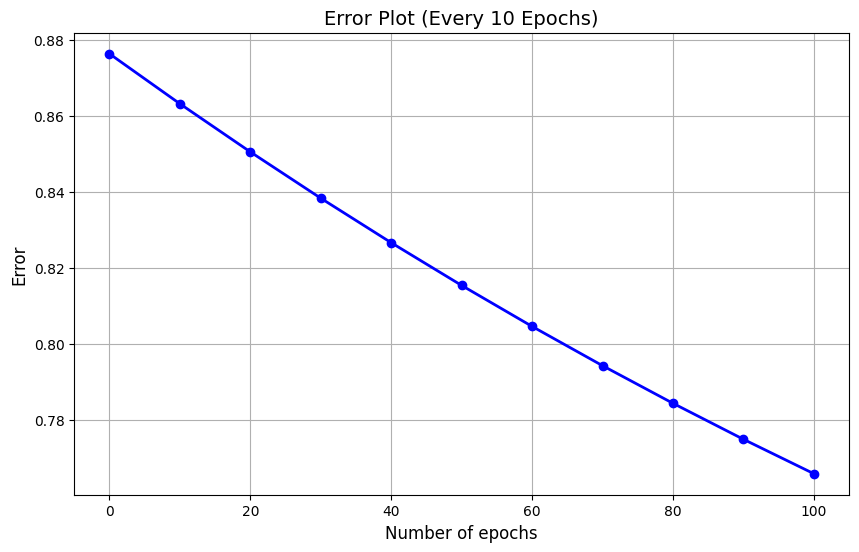


Plot: Part 2 - Decision Boundary with learning_rate = 0.1, epochs = 100


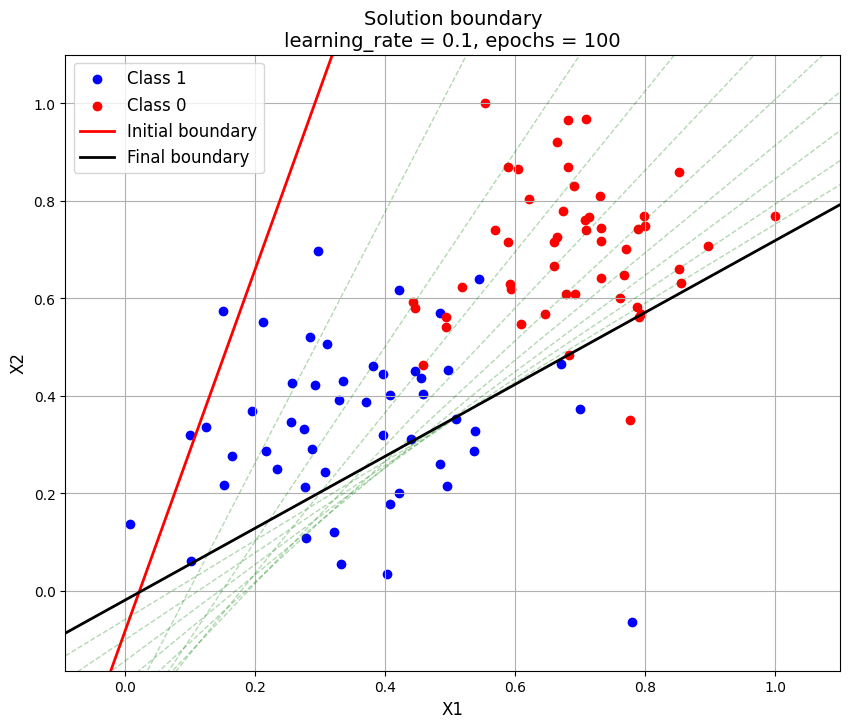

Plot: Part 2 - Error Plot with learning_rate = 0.1, epochs = 100


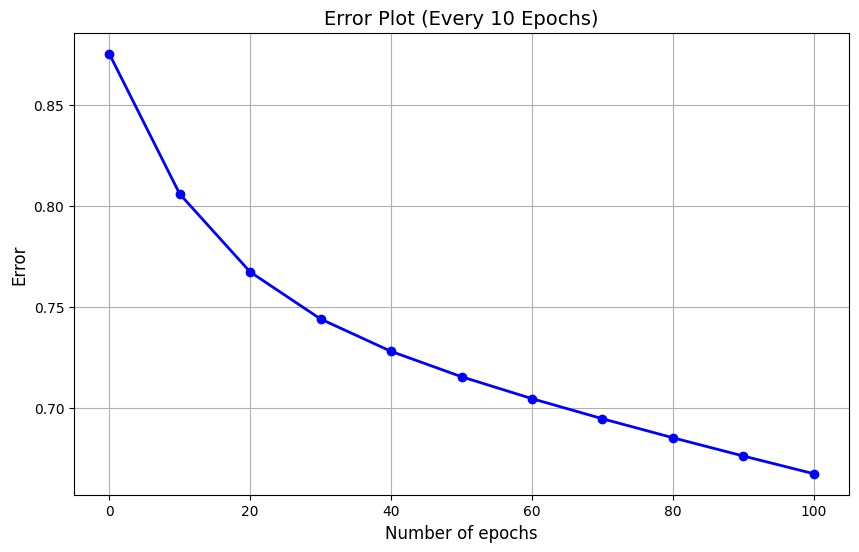


Plot: Part 2 - Decision Boundary with learning_rate = 1.0, epochs = 100


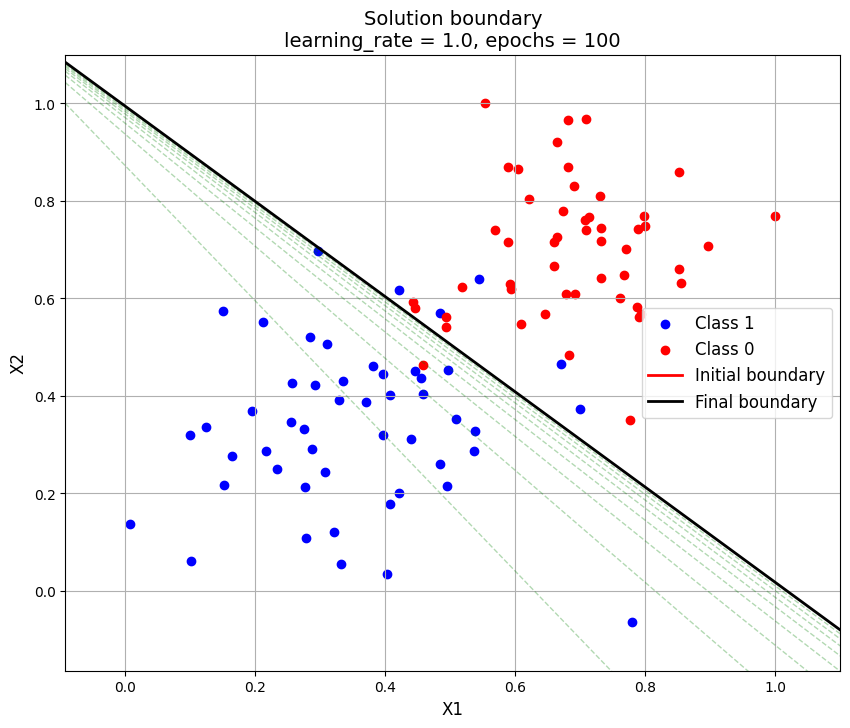

Plot: Part 2 - Error Plot with learning_rate = 1.0, epochs = 100


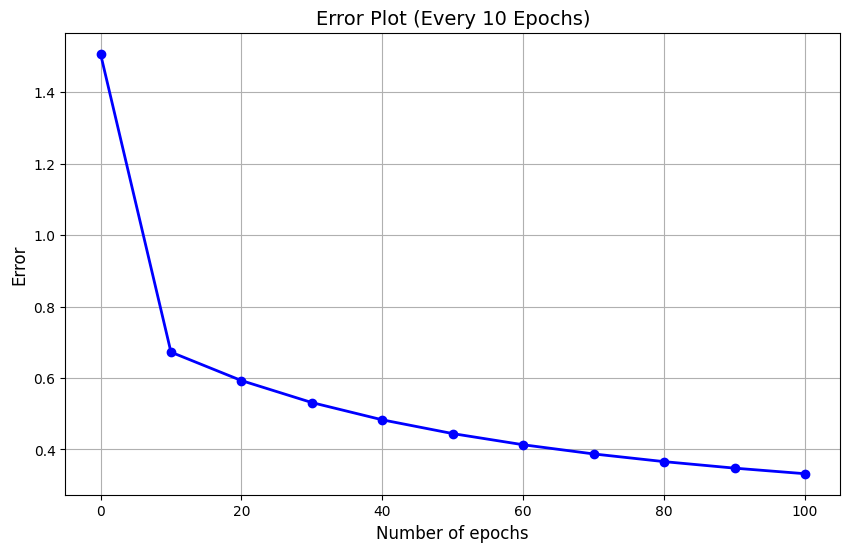


Plot: Part 2 - Decision Boundary with learning_rate = 0.1, epochs = 50


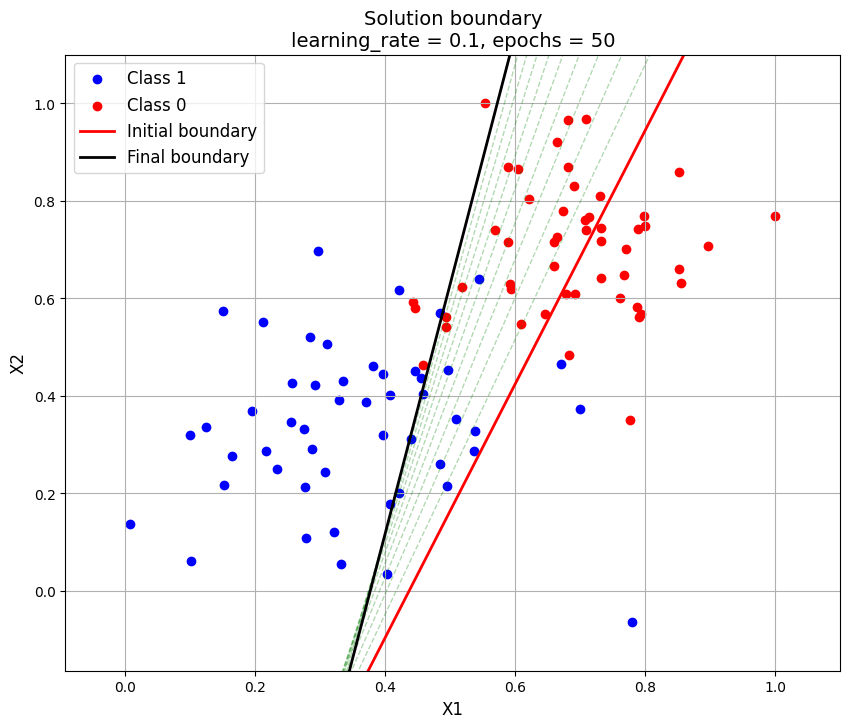

Plot: Part 2 - Error Plot with learning_rate = 0.1, epochs = 50


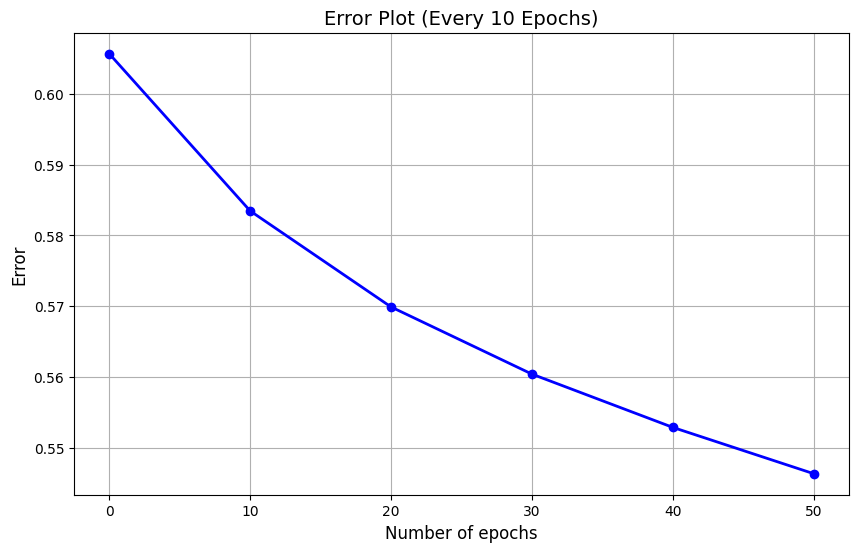


Plot: Part 2 - Decision Boundary with learning_rate = 0.1, epochs = 200


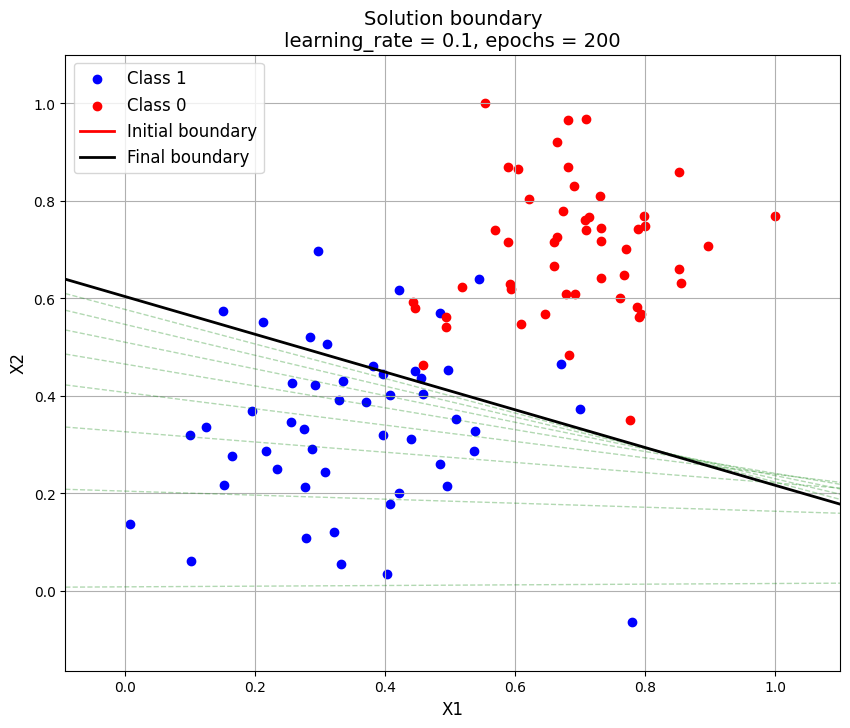

Plot: Part 2 - Error Plot with learning_rate = 0.1, epochs = 200


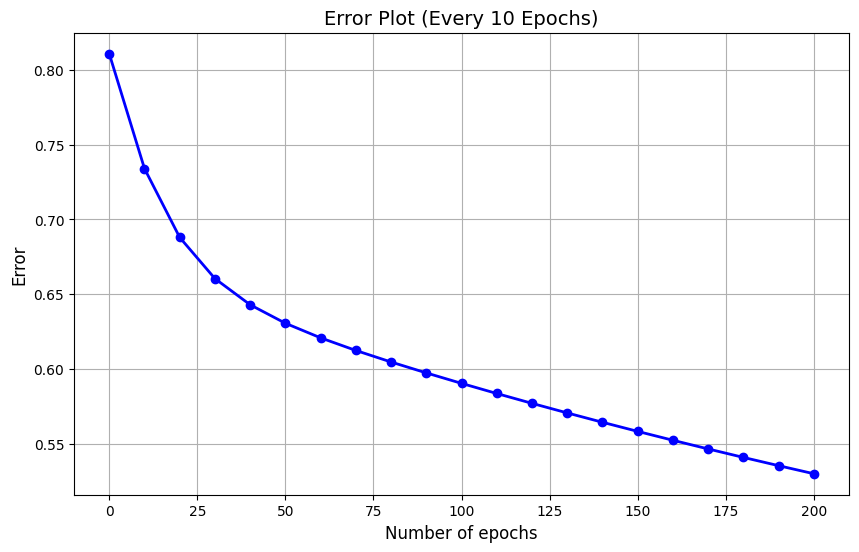


Part 2 Results:


,learning_rate,epochs,final_weights,final_bias,final_loss
0,0.01,100,"[0.7005462847183637, -2.306868797767225]",-0.486227,0.765859
1,0.10,100,"[1.0116298691218166, -1.370870732345595]",-0.026189,0.667187
2,1.00,100,"[-3.1369932715979116, -3.209433534781439]",3.193585,0.332196
3,0.10,50,"[-2.810725192078327, 0.5488417835524867]",1.060486,0.546332
4,0.10,200,"[-0.6168204014131361, -1.5921856268841403]",0.961818,0.530200


In [9]:
# Prepare data for Part 2
X = data[['X1', 'X2']].values
y = data['y'].values

# Experiment with different learning rates and epochs
learning_rates = [0.01, 0.1, 1.0]
epochs_list = [50, 100, 200]
results_part2 = []

# Experiment with different learning rates (fixed epochs = 100)
for lr in learning_rates:
    print(f"\nPlot: Part 2 - Decision Boundary with learning_rate = {lr}, epochs = 100")
    
    # Initialize and train perceptron
    model = PerceptronGradientDescent(learning_rate=lr, epochs=100)
    model.fit(X, y)
    
    # Plot and save decision boundary
    model.plot_decision_boundary(X, y, title=f'learning_rate = {lr}, epochs = 100')
    plt.savefig(f'part2_lr_{lr}_boundary.png')
    plt.show()
    
    print(f"Plot: Part 2 - Error Plot with learning_rate = {lr}, epochs = 100")
    # Plot and save error
    model.plot_error()
    plt.savefig(f'part2_lr_{lr}_error.png')
    plt.show()
    
    # Store results
    results_part2.append({
        'learning_rate': lr,
        'epochs': 100,
        'final_weights': model.weights,
        'final_bias': model.bias,
        'final_loss': model.losses[-1]
    })

# Experiment with different number of epochs (fixed learning_rate = 0.1)
for epochs in epochs_list:
    if epochs == 100:  # Already done above
        continue
    
    print(f"\nPlot: Part 2 - Decision Boundary with learning_rate = 0.1, epochs = {epochs}")
    
    # Initialize and train perceptron
    model = PerceptronGradientDescent(learning_rate=0.1, epochs=epochs)
    model.fit(X, y)
    
    # Plot and save decision boundary
    model.plot_decision_boundary(X, y, title=f'learning_rate = 0.1, epochs = {epochs}')
    plt.savefig(f'part2_epochs_{epochs}_boundary.png')
    plt.show()
    
    print(f"Plot: Part 2 - Error Plot with learning_rate = 0.1, epochs = {epochs}")
    # Plot and save error
    model.plot_error()
    plt.savefig(f'part2_epochs_{epochs}_error.png')
    plt.show()
    
    # Store results
    results_part2.append({
        'learning_rate': 0.1,
        'epochs': epochs,
        'final_weights': model.weights,
        'final_bias': model.bias,
        'final_loss': model.losses[-1]
    })

# Display results table
print("\nPart 2 Results:")
results_df = pd.DataFrame(results_part2)
results_df

## Analysis of Part 1:
In Part 1, the perceptron model effectively distinguishes two classes, with the error consistently decreasing as epochs increase, demonstrating clear convergence. Comparing learning rates (0.01, 0.1, 1.0) reveals that higher learning rates accelerate convergence significantly, achieving a low final error (~0.4 for learning rate 1.0 compared to ~0.7 for learning rate 0.01). Boundaries evolve rapidly from initial to final positions, especially at the highest learning rate (1.0), which results in the most distinct and accurate classification boundary.

## Analysis of Part 2:
In Part 2, varying epochs (50, 100, 200) and learning rates (0.01, 0.1, 1.0) highlights important differences in convergence behavior. Increasing epochs consistently improves accuracy, with the error significantly reduced at 200 epochs (~0.55) compared to 50 epochs (~0.60). The solution boundaries become progressively more accurate with increasing epochs. High learning rates (0.1 and 1.0) again demonstrate more rapid convergence and clearer class separability compared to the slower learning rate of 0.01. Optimal classification boundaries and minimal error are clearly achieved at higher learning rates and higher epoch counts.